In [1]:
from IPython.display import SVG, display, Image
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Chem
import requests

In [2]:
def get_chebi_data(chebi_id):
    # get molfile
    molfile = requests.get(url = f"https://www.ebi.ac.uk/chebi/saveStructure.do?defaultImage=true&chebiId={chebi_id}&imageId=0")
    
    # get image from ChEBI
    image = requests.get(f"https://www.ebi.ac.uk/chebi/displayImage.do?defaultImage=true&imageIndex=0&chebiId={chebi_id}&dimensions=400")
    return molfile.text, image.content

def get_rdkit_depiction(molfile):
    mol = Chem.MolFromMolBlock(molfile)
    d = rdMolDraw2D.MolDraw2DSVG(400, 400)
    d.DrawMolecule(mol)
    d.FinishDrawing()
    p = d.GetDrawingText()
    return p

In [3]:
# few problematic ChEBI molecules
chebi_ids = [4439, 76109, 59297]

# No SGroups found

In [4]:
for chebi_id in chebi_ids:
    molfile, image = get_chebi_data(chebi_id)
    mol = Chem.MolFromMolBlock(molfile)
    sgroups = Chem.GetMolSubstanceGroups(mol)
    print(f"ChEBI:{chebi_id},", f"{len(sgroups)} substance groups found")

ChEBI:4439, 0 substance groups found
ChEBI:76109, 0 substance groups found
ChEBI:59297, 0 substance groups found


# Show ChEBI image + RDKit depicition

ChEBI:4439 Image


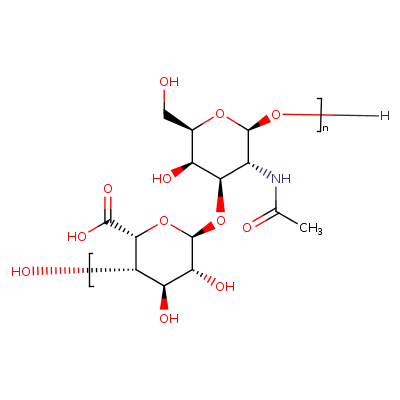

RDKit depiction


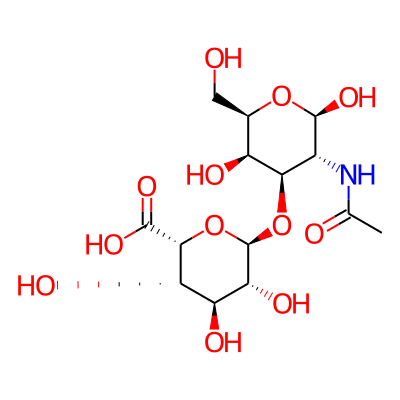

ChEBI:76109 Image


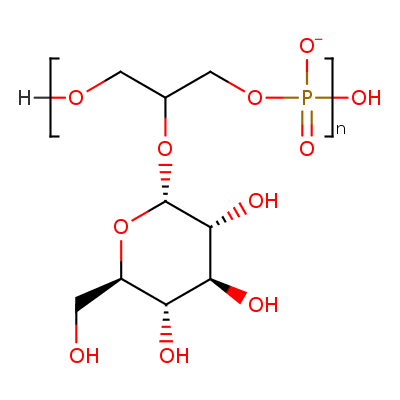

RDKit depiction


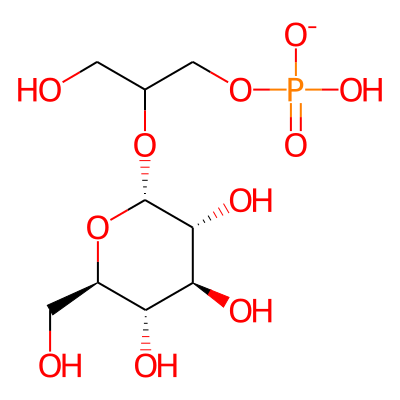

ChEBI:59297 Image


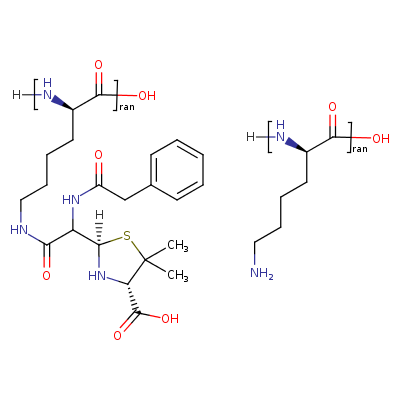

RDKit depiction


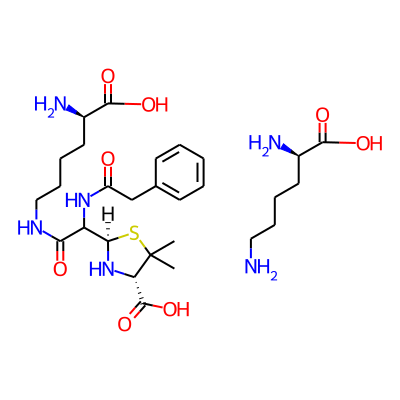

In [5]:
for chebi_id in chebi_ids:
    molfile, image = get_chebi_data(chebi_id)
    mol = Chem.MolFromMolBlock(molfile)
    rdi = get_rdkit_depiction(molfile)
    
    print(f"ChEBI:{chebi_id} Image")
    display(Image(image))

    print("RDKit depiction")
    p = get_rdkit_depiction(molfile)
    display(SVG(p))

# It seems the bond group (SBL) is not well parsed. Dropping SBL line seems to let the SGroups to be parsed
but the information is obviously needed to correctly place the brackets 

ChEBI:4439, 1 substance groups found


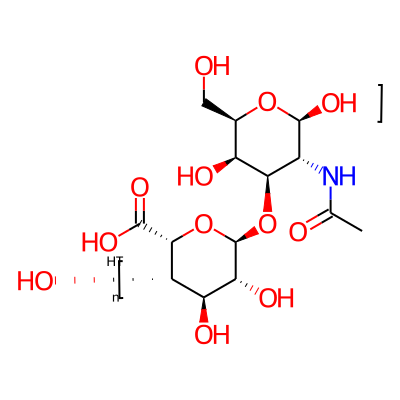

ChEBI:76109, 1 substance groups found


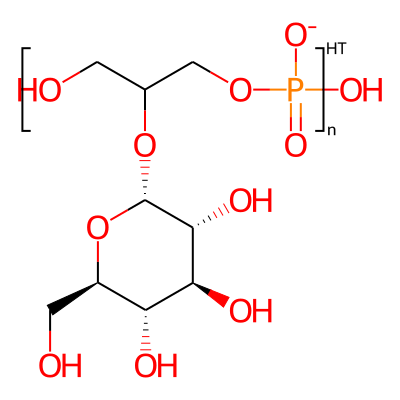

ChEBI:59297, 2 substance groups found


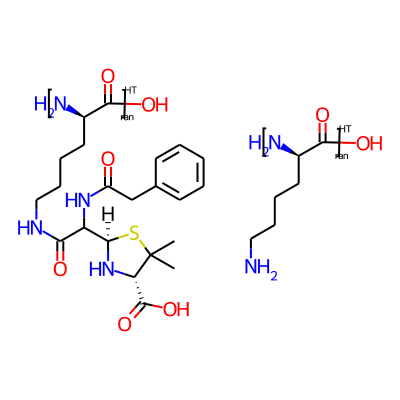

In [6]:
for chebi_id in chebi_ids:
    molfile, image = get_chebi_data(chebi_id)
    # drop sbl line
    lines = filter(lambda line: False if line.startswith("M  SBL") else True, molfile.split("\n"))
    molfile = "\n".join(lines)
    mol = Chem.MolFromMolBlock(molfile)
    sgroups = Chem.GetMolSubstanceGroups(mol)
    print(f"ChEBI:{chebi_id},", f"{len(sgroups)} substance groups found")
    p = get_rdkit_depiction(molfile)
    display(SVG(p))